In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import pandas as pd

from sklearn import neighbors

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_val_score

In [2]:
# import cardio_data.csv
df = pd.read_csv('Dataset/cardio_data.csv')
df

#use 4 features as predictors variables
X = df[["ap_hi", "ap_lo", "cholesterol", "gluc"]]
y = df["cardio"]

In [3]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)

In [4]:
# Create an instance of KNN Classifier and fit the data.
n_neighbors = 200

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=200, weights='distance')

In [5]:
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[20595  3965]
 [ 9188 15252]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76     24560
           1       0.79      0.62      0.70     24440

    accuracy                           0.73     49000
   macro avg       0.74      0.73      0.73     49000
weighted avg       0.74      0.73      0.73     49000



Accuracy with k=200: 0.7375238095238095


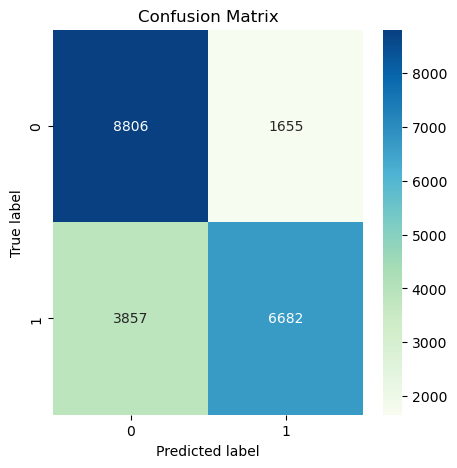

              precision    recall  f1-score   support

           0       0.70      0.84      0.76     10461
           1       0.80      0.63      0.71     10539

    accuracy                           0.74     21000
   macro avg       0.75      0.74      0.73     21000
weighted avg       0.75      0.74      0.73     21000



In [6]:
#evaluation on test data

y_pred = clf.predict(X_test)
print("Accuracy with k=200:", accuracy_score(y_test, y_pred))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, y_pred))

In [7]:
accuracy = clf.score(X_test, y_test)
print("test score:",accuracy)

test score: 0.7375238095238095


In [8]:
k_range = [100,200,300,500, 800,1000, 2000]
k_scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7227857142857143, 0.7230857142857141, 0.7227857142857143, 0.7224428571428572, 0.7224857142857143, 0.7225285714285714, 0.7223428571428571]


In [9]:
k_range = [1, 10, 20, 30, 40, 70, 100]
k_scores = []
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6544714285714286, 0.7026142857142857, 0.7202142857142857, 0.7206, 0.7205571428571428, 0.7225285714285714, 0.7227857142857143]
